# Titanic Survival Prediction: Model Building

In this notebook, we will build and evaluate multiple machine learning models to predict passenger survival on the Titanic. We will try three different algorithms: Logistic Regression, Decision Tree, and Random Forest. We will also evaluate the models using accuracy and other performance metrics.

---

### Import Libraries

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

### Load and Prepare Data

We will load the preprocessed Titanic dataset (train_preprocessed.csv) and separate it into features (X) and the target variable (y), which is Survived.

In [5]:
tested = pd.read_csv('/content/tested_preprocessed.csv')

X = tested.drop('Survived', axis=1)
y = tested['Survived']

Convert categorical variables into numeric form before feeding them into the model.

In [12]:
# Suppose 'X' is a DataFrame and 'cat_cols' are the categorical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'  # Keep other columns
)

X_encoded = preprocessor.fit_transform(X)

Split the data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Display the shape of the training and testing sets

In [14]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (334, 8)
Testing set shape: (84, 8)


## Logistic Regression Model

Initialize and train the Logistic Regression model

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Make predictions on the test set

In [16]:
y_pred_logreg = logreg.predict(X_test)

Evaluate the Logistic Regression model

In [17]:
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Performance:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall: {logreg_recall:.4f}")
print(f"F1 Score: {logreg_f1:.4f}")

Logistic Regression Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


## Decision Tree Model

Initialize and train the Decision Tree model

In [19]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Make predictions on the test set

In [20]:
y_pred_tree = decision_tree.predict(X_test)

Evaluate the Decision Tree model

In [21]:
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

print("Decision Tree Performance:")
print(f"Accuracy: {tree_accuracy:.4f}")
print(f"Precision: {tree_precision:.4f}")
print(f"Recall: {tree_recall:.4f}")
print(f"F1 Score: {tree_f1:.4f}")

Decision Tree Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


## Random Forest Model

Initialize and train the Random Forest model

In [22]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make predictions on the test set

In [23]:
y_pred_rf = random_forest.predict(X_test)

Evaluate the Random Forest model

In [24]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


## Model Comparison

We will now compare the performance of all three models.

In [25]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [logreg_accuracy, tree_accuracy, rf_accuracy],
    'Precision': [logreg_precision, tree_precision, rf_precision],
    'Recall': [logreg_recall, tree_recall, rf_recall],
    'F1 Score': [logreg_f1, tree_f1, rf_f1]
})

# Display the comparison table
model_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0,1.0
2,Random Forest,1.0,1.0,1.0,1.0


## Confusion Matrix

Logistic Regression Confusion Matrix

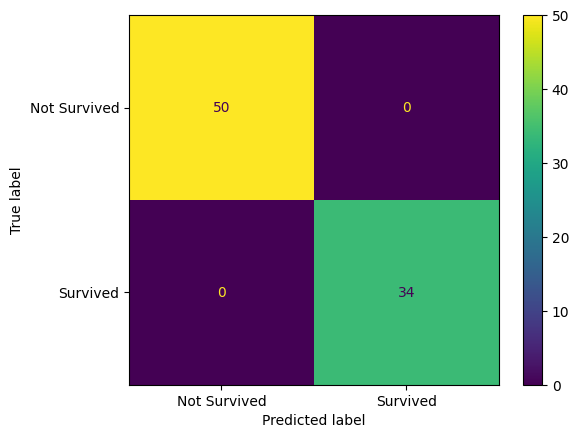

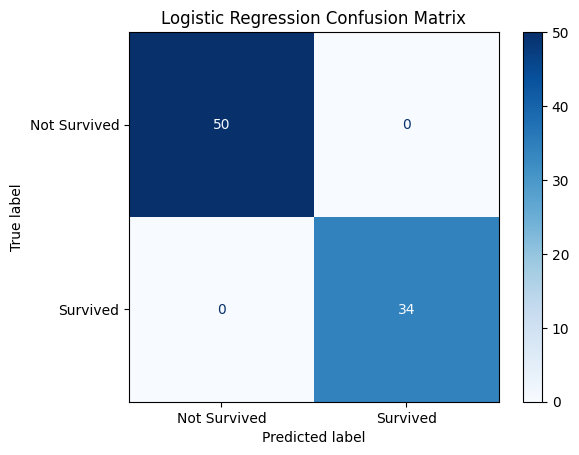

In [33]:
disp_logreg = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=["Not Survived", "Survived"])
disp_logreg.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Decision Tree Confusion Matrix

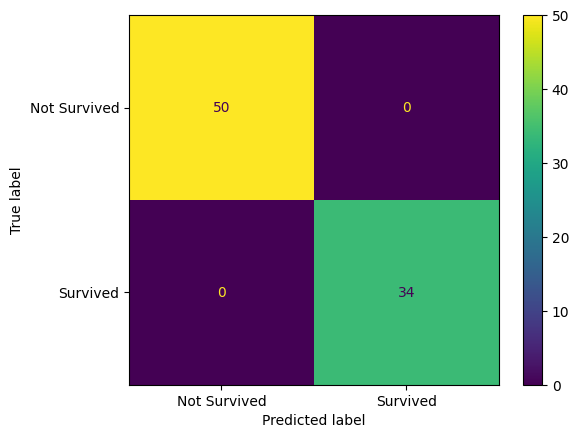

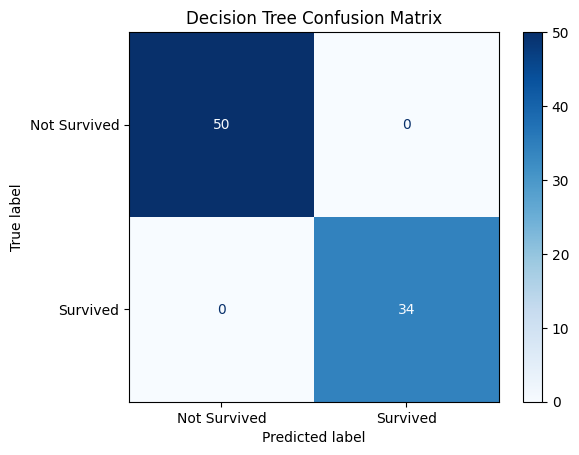

In [34]:
disp_tree = ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, display_labels=["Not Survived", "Survived"])
disp_tree.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

Random Forest Confusion Matrix

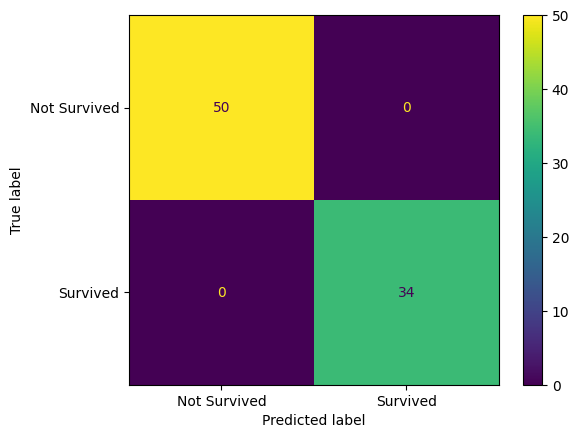

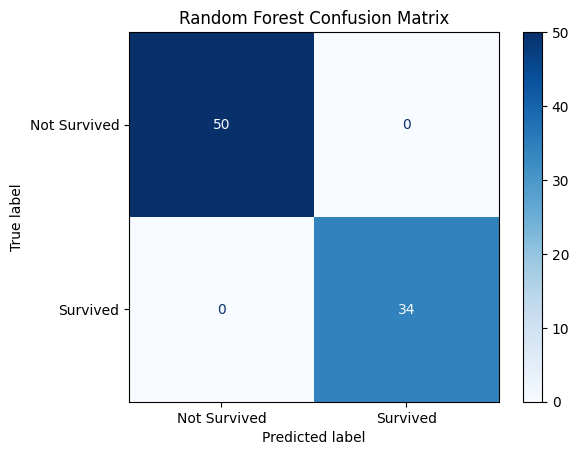

In [35]:
disp_rf = ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, display_labels=["Not Survived", "Survived"])
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

## Conclusion
In this notebook, we:

- Built and trained three machine learning models: Logistic Regression, Decision Tree, and Random Forest.

- Evaluated the models using accuracy, precision, recall, and F1 score.

- Compared the performance of all three models.

- Visualized confusion matrices to better understand the model predictions.